# Task 3

# Price Prediction of used cars(Car Dekho)

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import warnings

warnings.filterwarnings('ignore')


In [2]:
import os
os.chdir(r'C:\Users\HP\Untitled Folder 2')

# Analyze Data frames

In [3]:
df = pd.read_csv("cars.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
#print(df)

# Head
- it shows the first N row in the data (by default N=5)

In [5]:
# df.head()

# Shape
- it shows the total no,of rows and no.of columns of the dataframe

In [6]:
df.shape

(301, 9)

# Info
- Provides basic information about the dataframe.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Missing Values in Dataframe
- it shows the total no.of non-null values in each column

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# columns 
- it shows the name of each columns

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## dropping unnecessary columns

In [11]:
df.drop(columns=['Owner'] ,inplace=True)

In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission'],
      dtype='object')

In [13]:
corr_mat = df.corr()
corr_mat

,Year,Selling_Price,Present_Price,Kms_Driven
Year,1.000000,0.236141,-0.047584,-0.524342
Selling_Price,0.236141,1.000000,0.878983,0.029187
Present_Price,-0.047584,0.878983,1.000000,0.203647
Kms_Driven,-0.524342,0.029187,0.203647,1.000000


## Index
- this attribute provides the index of dataframe

In [14]:
df.index

RangeIndex(start=0, stop=301, step=1)

# Data Types
- it shows the Data-types of each columns.

In [15]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
dtype: object

#  The unique Values
- in a Columns it shows al unique values. it can applied on a single Column only, not on the Whole dataframe.

In [16]:
df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [17]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

# nunique
-  it shows the total no.of unique in each values in each column. it can be applied on a single column as well as on whole dataframe

In [18]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
dtype: int64

In [19]:
summary=df.describe()
summary

,Year,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.644115,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


## Fuel types in Cars

In [20]:
print(df['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

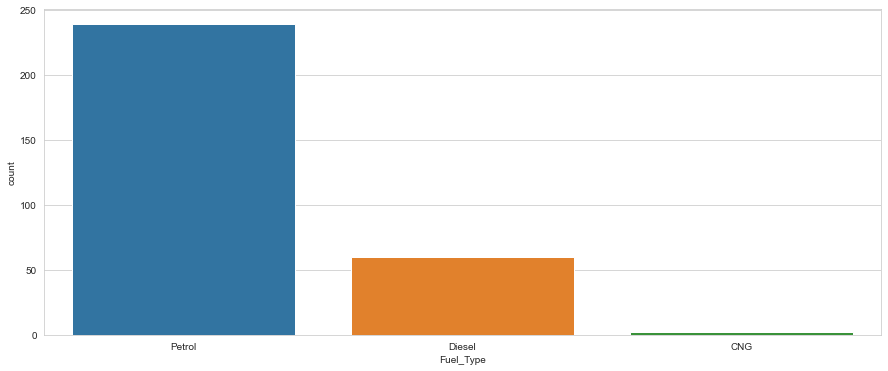

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
sns.countplot(x = 'Fuel_Type', data =df )

## Seller type in Cars

In [22]:
print(df['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

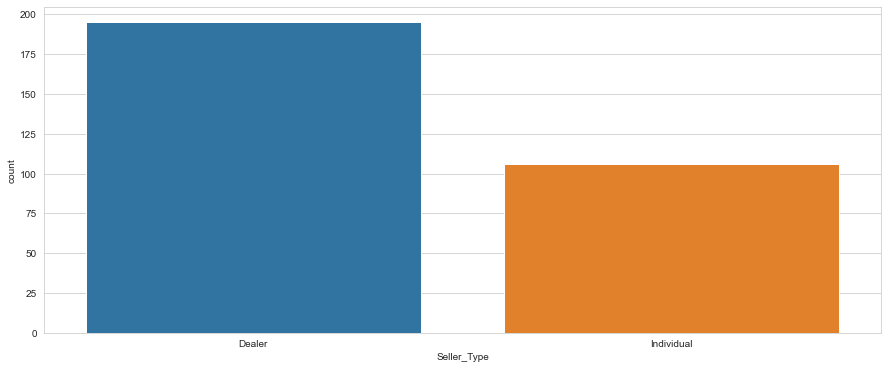

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
sns.countplot(x = 'Seller_Type', data =df )

## Transmission in Car 

In [24]:
print(df['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


<AxesSubplot:xlabel='Transmission', ylabel='count'>

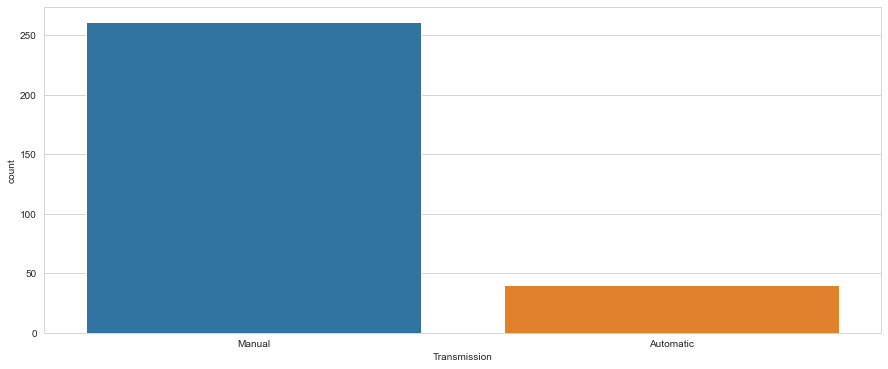

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
sns.countplot(x = 'Transmission', data =df )

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

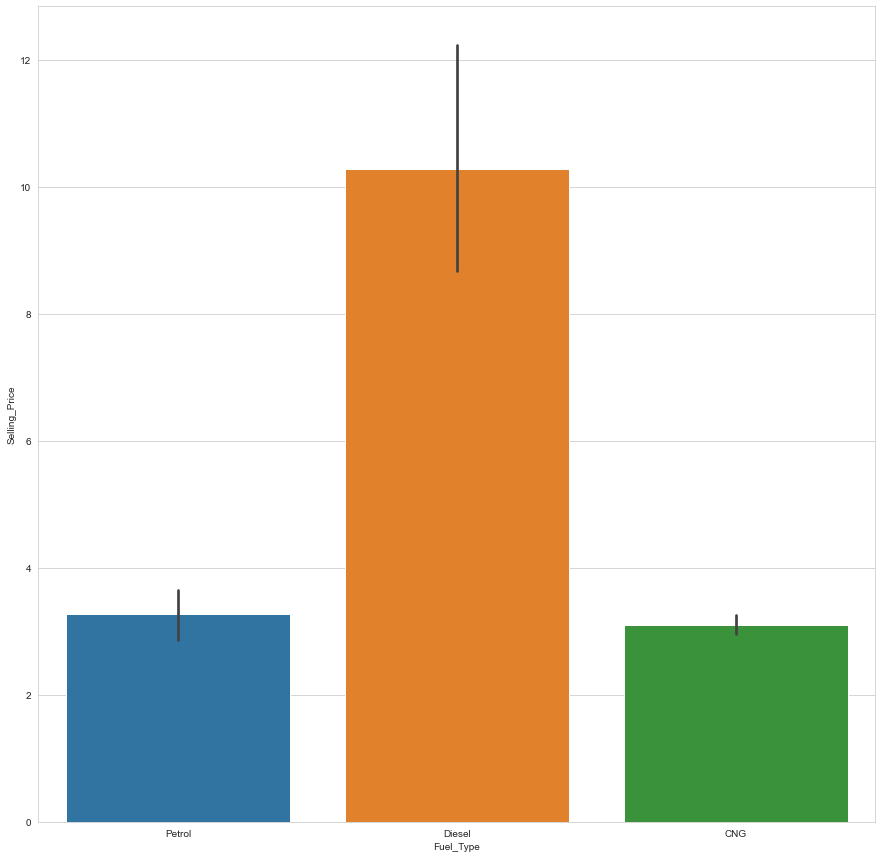

In [26]:
plt.figure(figsize = (15,15))
sns.barplot(x='Fuel_Type', y='Selling_Price',  data = df)

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

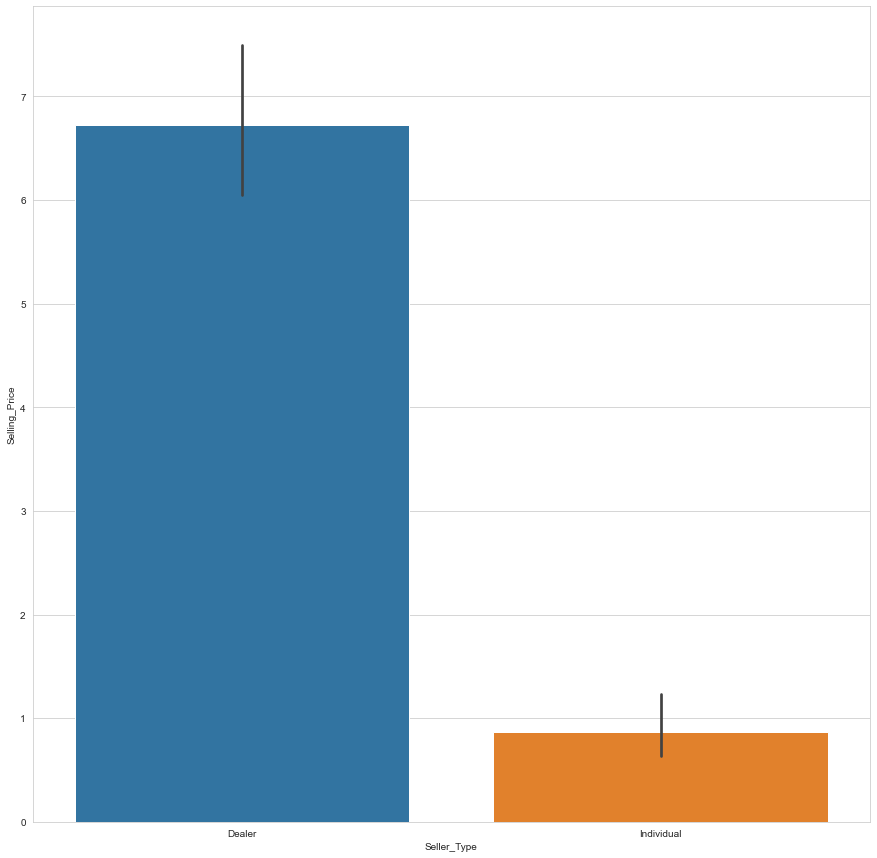

In [27]:
plt.figure(figsize = (15,15))
sns.barplot(x='Seller_Type', y='Selling_Price',  data = df)

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

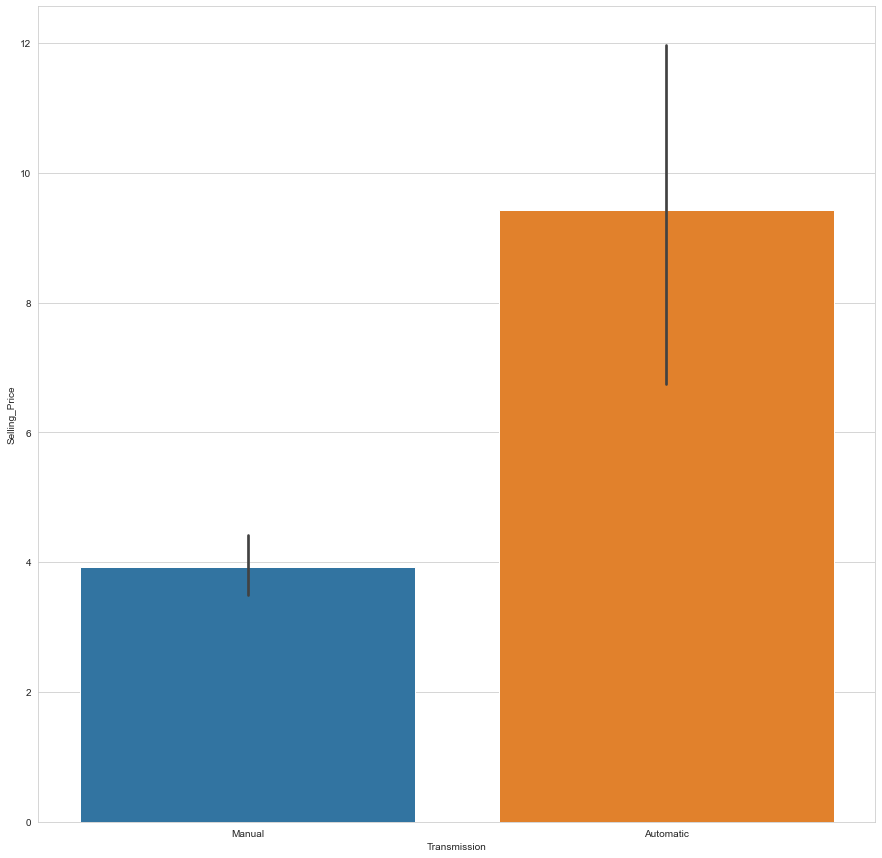

In [28]:
plt.figure(figsize = (15,15))
sns.barplot(x='Transmission', y='Selling_Price',  data = df)

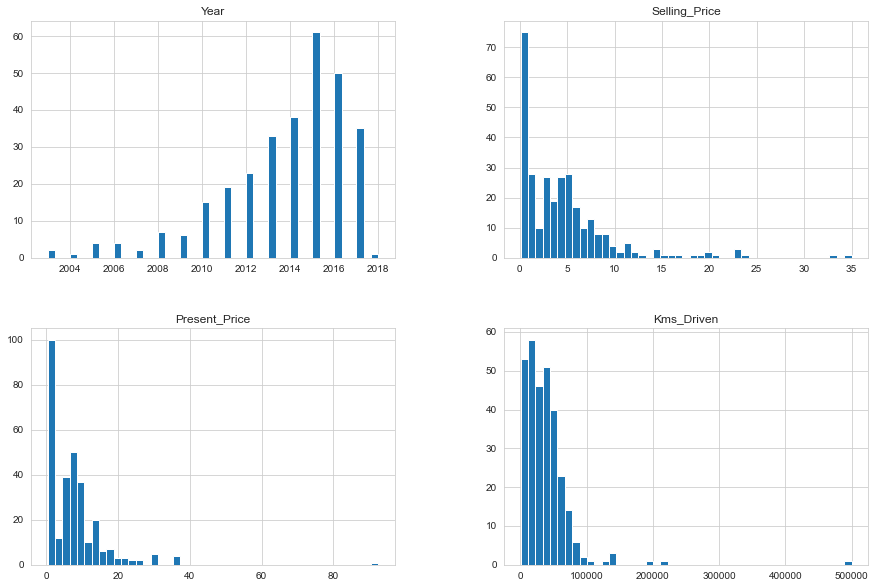

In [29]:
df.hist(bins = 45, figsize = (15,10))
plt.show()


<AxesSubplot:xlabel='Year'>

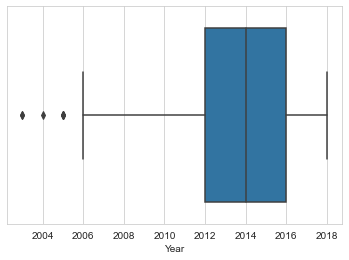

In [30]:
sns.boxplot(df['Year'])

<AxesSubplot:xlabel='Selling_Price'>

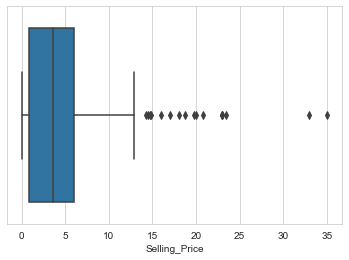

In [31]:
sns.boxplot(df['Selling_Price'])

<AxesSubplot:xlabel='Present_Price'>

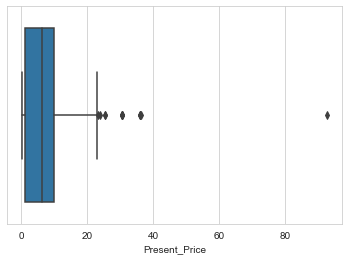

In [32]:
sns.boxplot(df['Present_Price'])

<AxesSubplot:xlabel='Kms_Driven'>

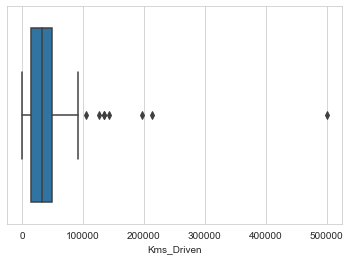

In [33]:
sns.boxplot(df['Kms_Driven'])

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

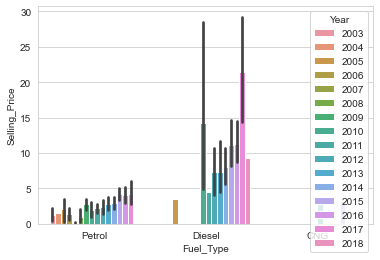

In [34]:
sns.barplot(x='Fuel_Type',y='Selling_Price',hue='Year',data=df)

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

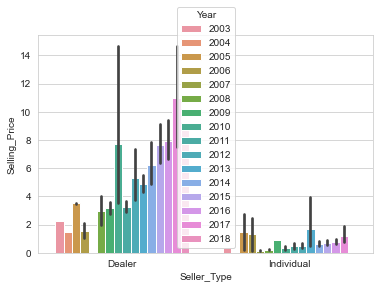

In [35]:
sns.barplot(x='Seller_Type',y='Selling_Price',hue='Year',data=df)

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

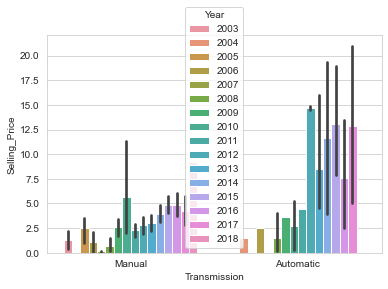

In [36]:
sns.barplot(x='Transmission',y='Selling_Price',hue='Year',data=df)